#  Pandas tutorial

**Author: Kuba Czech, 156035**

Pandas (panel data) is the second most useful Python library for data analysis and preparation. It allows to work with tabular data and provides very efficient and easy methods for:
- data selection
- data modification
- data indexing
- merging of data from various sources
- transforming data
- feeding data into `scikit-learn` and other ML-related libraries

In this tutorial we will go through the most useful and common operations performed on pandas.

There are two fundamental data structures that you need to understand:

- `pd.Series`: similar to a list, requires all elements to be of the same type, but provides additional methods and operations
- `pd.DataFrame`: this is the data structure which represents tabular data, each column in a data frame is a `Series` object, in addition each data frame contains a row index and a column index.

Let's dive into coding.

## Manual creation of a data frame

By convention, `pandas` library is imported using the alias `pd`.

The simplest way to create a dataframe is to provide a dictionary of lists. Each key becomes the name of the column, each list becomes the series contained in the column.

In [2]:
import pandas as pd

df = pd.DataFrame(
{
    'Code': ['PL', 'DE', 'GB', 'CZ'],
    'Name': ['Poland', 'Germany', 'Great Britain', 'Czech Republic'],
    'Population': [38000000, 80000000, 65000000, 10000000]
})

df

,Code,Name,Population
0,PL,Poland,38000000
1,DE,Germany,80000000
2,GB,Great Britain,65000000
3,CZ,Czech Republic,10000000


Each column is a `pd.Series` object. We can inspect it using either the dot notation, or by referring to the column by its name in brackets.

In [3]:
df.Population

0    38000000
1    80000000
2    65000000
3    10000000
Name: Population, dtype: int64

In [4]:
df[['Population','Code']]

,Population,Code
0,38000000,PL
1,80000000,DE
2,65000000,GB
3,10000000,CZ


## Reading data from a file

There are two most common ways of reading text files into `pandas`:
- `pd.read_table`: assumes tab-separated text file
- `pd.read_csv`: assumes comma-separated text file

For the sake of reproducibility we will use public onlie datasets and we will read them directly off the Web. Please take a moment to investigate these datasets:

- [Chipotle orders](https://bit.ly/chiporders)
- [UFO sighting reports](https://bit.ly/uforeports)
- [IMDB movie ratings](https://bit.ly/imdbratings)
- [Drinking by country](https://bit.ly/drinksbycountry)

In [5]:
orders = pd.read_table('https://bit.ly/chiporders')

orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
ufo = pd.read_csv('https://bit.ly/uforeports')

ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Individual series can be concatenated just like strings in Python.

In [7]:
orders.item_name + ' ' + orders.item_price

0                Chips and Fresh Tomato Salsa $2.39 
1                                        Izze $3.39 
2                            Nantucket Nectar $3.39 
3       Chips and Tomatillo-Green Chili Salsa $2.39 
4                               Chicken Bowl $16.98 
                            ...                     
4617                           Steak Burrito $11.75 
4618                           Steak Burrito $11.75 
4619                      Chicken Salad Bowl $11.25 
4620                       Chicken Salad Bowl $8.75 
4621                       Chicken Salad Bowl $8.75 
Length: 4622, dtype: object

## Analyzing a data frame

`pandas` provides simple methods that allow you to investigate the aggregate properties of individual series and the entire data frame.

In [8]:
movies = pd.read_csv('https://bit.ly/imdbratings')

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


A simple way to quickly learn the distribution of a feature is to use the `describe()` method

In [9]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

The output of the `describe()` method depends on whether the feature is numerical or categorical.

In [10]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

One can apply the `describe()` method to the entire dataframe as well.

In [11]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [12]:
movies.shape

(979, 6)

In [13]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [14]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

For more advanced analysis of `pandas` dataframe we can use the excellent `pandas-profiling` library

In [15]:
#from pandas_profiling import ProfileReport

# movies_profile = ProfileReport(df=movies, title="Analysis of the Movies dataframe", explorative=True)
# movies_profile

# or simply: movies.profile_report(title="Analysis of the Movies dataframe")
#movies.profile_report(title = "Analysis of the Movies dataframe")

## Renaming columns

In [16]:
ufo = pd.read_csv('https://bit.ly/uforeports')

ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [17]:
ufo['Colors Reported']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18236    NaN
18237    NaN
18238    NaN
18239    RED
18240    NaN
Name: Colors Reported, Length: 18241, dtype: object

If a column name contains a space, it can no longer be used with the dot notation. There are many ways a column may be renamed.

In [18]:
ufo.rename(columns={'Colors Reported': 'Colors_Reported', 'Time': 'Date and time'})

,City,Colors_Reported,Shape Reported,State,Date and time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [19]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [20]:
col_names = ['city', 'colors_reported', 'shape_reported', 'state', 'time']

pd.read_csv('https://bit.ly/uforeports', names=col_names)

,city,colors_reported,shape_reported,state,time
0,City,Colors Reported,Shape Reported,State,Time
1,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
2,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
3,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
4,Abilene,NaN,DISK,KS,6/1/1931 13:00
...,...,...,...,...,...
18237,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18238,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18239,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18240,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [21]:
ufo.columns = col_names + ['non existing column']

ufo.head()

ValueError: Length mismatch: Expected axis has 5 elements, new values have 6 elements

## Dropping rows and columns

An important concept in `pandas` is the concept of an **axis**. An axis is the direction in which an operation is performed. 0-axis refers to an operation that is applied to each row, 1-axis refers to an operation which is applied to all columns.

By default, `pandas` expects the rows to be dropped, so if you want to drop a column, you have to explicitly state `axis=1`.

In [ ]:
drinks = pd.read_csv('https://bit.ly/drinksbycountry')

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.shape

(193, 6)

In [ ]:
drinks.beer_servings.mean()

106.16062176165804

In [ ]:
#drinks.mean(axis=1)

In [ ]:
ufo = pd.read_csv('https://bit.ly/uforeports')

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.drop('City', axis=1)

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...
18236,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,NaN,DISK,IA,12/31/2000 23:00
18238,NaN,NaN,WI,12/31/2000 23:45
18239,RED,LIGHT,WI,12/31/2000 23:45


In [ ]:
ufo_backup = ufo.set_index('City')

In [ ]:
ufo_backup.head()

,Colors Reported,Shape Reported,State,Time
City,,,,
Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
Holyoke,NaN,OVAL,CO,2/15/1931 14:00
Abilene,NaN,DISK,KS,6/1/1931 13:00
New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo_backup.drop('Ithaca', axis=0)

,Colors Reported,Shape Reported,State,Time
City,,,,
Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
Holyoke,NaN,OVAL,CO,2/15/1931 14:00
Abilene,NaN,DISK,KS,6/1/1931 13:00
New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
Valley City,NaN,DISK,ND,9/15/1934 15:30
...,...,...,...,...
Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
Eagle River,NaN,NaN,WI,12/31/2000 23:45


In [ ]:
ufo.drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.drop([1,3,4]).head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00


In [ ]:
ufo.index[0:10]

RangeIndex(start=0, stop=10, step=1)

In [ ]:
ufo.drop(ufo.index[0:3]).head()

,City,Colors Reported,Shape Reported,State,Time
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00


All these operations do not change the underlying object, but return a modified copy of the object. If you want to perform the operation on the object, you should:
- add `inplace=True`: more efficient and explicit, or
- use assignment: may be a bit slower, but many people prefer this

In [ ]:
ufo.drop('State', axis=1, inplace=True)

ufo.head()

,City,Colors Reported,Shape Reported,Time
0,Ithaca,NaN,TRIANGLE,6/1/1930 22:00
1,Willingboro,NaN,OTHER,6/30/1930 20:00
2,Holyoke,NaN,OVAL,2/15/1931 14:00
3,Abilene,NaN,DISK,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,4/18/1933 19:00


In [ ]:
ufo = ufo.drop([0,1,4])

ufo.head()

,City,Colors Reported,Shape Reported,Time
2,Holyoke,NaN,OVAL,2/15/1931 14:00
3,Abilene,NaN,DISK,6/1/1931 13:00
5,Valley City,NaN,DISK,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,6/15/1935 0:00
7,Alma,NaN,DISK,7/15/1936 0:00


## Exercise

1. Read the *Titanic* dataset from https://tinyurl.com/y9p968ys into a dataframe called `titanic`
2. Display first 15 rows of the dataset
3. Rename `PassengerId` to `ID`, `Lname` to `last_name`, and `Name` to `first_name`
4. Remove all rows for which the cabin number is not known

In [23]:
#1. Reading the dataset
titanic = pd.read_csv('https://tinyurl.com/y9p968ys')

In [29]:
#2. Displaying first 15 rows of dataset
titanic.head(15)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Moran,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
#3. Renaming columns
titanic.rename(columns={'PassengerId': 'ID', 'Lname': 'last_name', 'Name': 'first_name'}, inplace = True)

In [42]:
#4. Removing rows with cabin number not known
titanic.dropna(subset = ['Cabin'])

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,Sandstrom,Miss. Marguerite Rut,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,Bonnell,Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,Beesley,Mr. Lawrence,male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,Sloper,Mr. William Thompson,male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,Fortune,Mr. Charles Alexander,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,Spencer,Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,Harper,Mrs. Henry Sleeper (Myna Haxtun),female,49.0,1,0,PC 17572,76.7292,D33,C


## Sorting data frames

You can sort individual series within a data frame, and you can sort the entire data frame. Sorting can be made permanent.

In [43]:
movies = pd.read_csv('https://bit.ly/imdbratings')

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [44]:
movies.duration.sort_index()

0      142
1      175
2      200
3      152
4      154
      ... 
974    116
975    118
976    138
977    114
978    126
Name: duration, Length: 979, dtype: int64

In [45]:
movies.duration.sort_values(ascending=False)

476    242
157    238
78     229
142    224
445    220
      ... 
293     68
88      68
258     67
338     66
389     64
Name: duration, Length: 979, dtype: int64

In [46]:
movies.sort_values('title', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
...,...,...,...,...,...,...
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [47]:
movies.sort_values(['content_rating', 'duration'])

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
...,...,...,...,...,...,...
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


## Filter rows by a value in a column

The filtering in `pandas` works very similarly to the way we do filtering in `NumPy`. We will start with creating a boolean series based on a condition, and then we will pass this series as an indexer to the data frame.

In [48]:
movies.genre == 'Horror'

0      False
1      False
2      False
3      False
4      False
       ...  
974    False
975    False
976    False
977     True
978    False
Name: genre, Length: 979, dtype: bool

In [49]:
movies.shape

(979, 6)

In [50]:
movies[movies.genre.isin(['Horror','Thriller','Mystery'])]

,star_rating,title,content_rating,genre,duration,actors_list
38,8.6,Rear Window,APPROVED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
46,8.5,Memento,R,Mystery,113,"[u'Guy Pearce', u'Carrie-Anne Moss', u'Joe Pan..."
57,8.5,Alien,R,Horror,117,"[u'Sigourney Weaver', u'Tom Skerritt', u'John ..."
62,8.5,The Shining,R,Horror,146,"[u'Jack Nicholson', u'Shelley Duvall', u'Danny..."
76,8.4,Vertigo,APPROVED,Mystery,128,"[u'James Stewart', u'Kim Novak', u'Barbara Bel..."
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
149,8.2,Rebecca,NOT RATED,Mystery,130,"[u'Laurence Olivier', u'Joan Fontaine', u'Geor..."
161,8.2,Diabolique,UNRATED,Horror,116,"[u'Simone Signoret', u'V\xe9ra Clouzot', u'Pau..."
186,8.2,The Thing,R,Horror,109,"[u'Kurt Russell', u'Wilford Brimley', u'Keith ..."


If we want to combine several conditions, there are two important things to remember:
- each condition must be in parentheses to help `pandas` establish the order of execution
- instead of `and`, `or` operators we must use `&` and `|`

In [51]:
movies[(movies.genre == 'Horror') & (movies.duration > 120)]

,star_rating,title,content_rating,genre,duration,actors_list
62,8.5,The Shining,R,Horror,146,"[u'Jack Nicholson', u'Shelley Duvall', u'Danny..."
317,8.0,Dawn of the Dead,UNRATED,Horror,127,"[u'David Emge', u'Ken Foree', u'Scott H. Reini..."
322,8.0,The Exorcist,R,Horror,122,"[u'Ellen Burstyn', u'Max von Sydow', u'Linda B..."
779,7.6,Interview with the Vampire: The Vampire Chroni...,R,Horror,123,"[u'Brad Pitt', u'Tom Cruise', u'Antonio Bander..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


We may also negate an index

In [52]:
movies[~(movies.duration > 120)]

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."
...,...,...,...,...,...,...
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."


## Exercise

1. Sort the `titanic` dataframe in the decreasing order of the fare price
2. Create a new dataframe `titanic_f` containing only information on female passengers
3. Create a new dataframe `titanic_x` containing only young passenges (age < 18) who did not embark in Cork.

In [53]:
titanic.head()

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
#1. Ordering data
titanic.sort_values(['Fare'], ascending = False).head()

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,89,1,1,Fortune,Miss. Mabel Helen,female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,Fortune,Mr. Charles Alexander,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,Baxter,Mr. Quigg Edmond,male,24.0,0,1,PC 17558,247.5208,B58 B60,C
31,32,1,1,Spencer,Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
62,63,0,1,Harris,Mr. Henry Birkhardt,male,45.0,1,0,36973,83.4750,C83,S


In [55]:
#2. Only females
titanic_f = titanic[titanic.Sex == 'female']
titanic_f.head(10)

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,Sandstrom,Miss. Marguerite Rut,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,Bonnell,Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,Vestrom,Miss. Hulda Amanda Adolfina,female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,Hewlett,Mrs. (Mary D Kingcome),female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,Vander Planke,Mrs. Julius (Emelia Maria Vandemoortele),female,31.0,1,0,345763,18.0000,NaN,S


In [56]:
#3. Only young and not embarked in Cherbourg
titanic_x = titanic[(titanic.Age < 18) & (titanic.Embarked != 'C')]
titanic_x.head(10)

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,Sandstrom,Miss. Marguerite Rut,female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,Vestrom,Miss. Hulda Amanda Adolfina,female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,Rice,Master. Eugene,male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,McGowan,Miss. Anna,female,15.0,0,0,330923,8.0292,NaN,Q
24,25,0,3,Palsson,Miss. Torborg Danira,female,8.0,3,1,349909,21.0750,NaN,S
50,51,0,3,Panula,Master. Juha Niilo,male,7.0,4,1,3101295,39.6875,NaN,S
58,59,1,2,West,Miss. Constance Mirium,female,5.0,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,Goodwin,Master. William Frederick,male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,Skoog,Master. Harald,male,4.0,3,2,347088,27.9000,NaN,S


## String methods

`pandas` makes it very easy to use all the string methods on data frame. Just remember to access these methods via the `str` attribute of the series. Method invocations can be easily chained because each method returns a `Series` object.

In [57]:
orders = pd.read_table('https://bit.ly/chiporders')

orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [58]:
orders.item_name

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

In [59]:
orders.item_name.str

In [60]:
orders.item_name.str.upper().str.lower().str.len()

0       28
1        4
2       16
3       37
4       12
        ..
4617    13
4618    13
4619    18
4620    18
4621    18
Name: item_name, Length: 4622, dtype: int64

In [61]:
orders.item_name.str.replace('Tomato','Pomodoro').str.lower().str.split()

0              [chips, and, fresh, pomodoro, salsa]
1                                            [izze]
2                               [nantucket, nectar]
3       [chips, and, tomatillo-green, chili, salsa]
4                                   [chicken, bowl]
                           ...                     
4617                               [steak, burrito]
4618                               [steak, burrito]
4619                         [chicken, salad, bowl]
4620                         [chicken, salad, bowl]
4621                         [chicken, salad, bowl]
Name: item_name, Length: 4622, dtype: object

## Exercise

1. Create a list of names of passengers consisting of the title (Mr., Miss., Mrs.) and the last name.
2. Create a list of names of passengers consisting of the first initial and the last name

In [62]:
titanic

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [64]:
titles = [record[0]+ ' ' for record in titanic.first_name.str.split()]
names = titanic.last_name
title_and_lname = pd.DataFrame({'title_and_last_name': titles + names})
title_and_lname

,title_and_last_name
0,Mr. Braund
1,Mrs. Cumings
2,Miss. Heikkinen
3,Mrs. Futrelle
4,Mr. Allen
...,...
151,Mrs. Pears
152,Mr. Meo
153,Mr. van Billiard
154,Mr. Olsen


In [65]:
names = [record[1][1] + '. ' for record in titanic.first_name.str.upper().str.split()]
last_names = titanic.last_name
initial_and_lname = pd.DataFrame({'initial_and_last_name': names + last_names})
initial_and_lname

,initial_and_last_name
0,W. Braund
1,O. Cumings
2,A. Heikkinen
3,A. Futrelle
4,I. Allen
...,...
151,H. Pears
152,L. Meo
153,U. van Billiard
154,L. Olsen


## Changing data type of a series

All elements in a `Series` object must have the same type. It is possible to cast the entire series to a new type using the builtin `Series.astype()` function. This can be done either during data reading, or after the data frame has been created.

In [66]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [67]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [68]:
orders.order_id.astype(float)

0          1.0
1          1.0
2          1.0
3          1.0
4          2.0
         ...  
4617    1833.0
4618    1833.0
4619    1834.0
4620    1834.0
4621    1834.0
Name: order_id, Length: 4622, dtype: float64

In [69]:
orders = pd.read_table('https://bit.ly/chiporders', dtype={'quantity': float})

orders.dtypes

order_id                int64
quantity              float64
item_name              object
choice_description     object
item_price             object
dtype: object

If we want to convert `item_price` to a number, we have to first remove the dollar sign from the string representation of the series, and then cast the entire series.

In [70]:
orders['item_price'] = orders.item_price.str.replace('$','').astype(float)

In [71]:
orders.dtypes

order_id                int64
quantity              float64
item_name              object
choice_description     object
item_price            float64
dtype: object

## Group by

`Pandas` offers a very broad range of methods for advanced data processing. A common operation is to create aggregates of the table based on the grouping of data on a column. This can be easily achieved using a single function call.

In [72]:
drinks = pd.read_csv('https://bit.ly/drinksbycountry')

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [73]:
#For future cells we need to get rid of non numerical attributes (country) so we can group by continent and have some statistics
drinks_without_countries = drinks.drop('country', axis = 1)

In [74]:
drinks.groupby('continent')

In [75]:
drinks_without_countries.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [76]:
drinks_without_countries.groupby('continent').std()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,80.557816,28.102794,38.846419,2.647557
Asia,49.469725,84.362160,21.667034,2.770239
Europe,99.631569,77.589115,97.421738,3.358455
North America,79.621163,94.993884,28.266378,2.409353
Oceania,96.641412,70.504817,64.555790,3.345688
South America,65.242845,77.077440,88.620189,1.531166


We can apply several aggregate functions to a grouped data frame using the `agg()` function

In [77]:
drinks_without_countries.groupby('continent').agg(['mean', 'min', 'max', 'count'])

beer_servings                spirit_servings                 \
                       mean min  max count            mean min  max count   
continent                                                                   
Africa            61.471698   0  376    53       16.339623   0  152    53   
Asia              37.045455   0  247    44       60.840909   0  326    44   
Europe           193.777778   0  361    45      132.555556   0  373    45   
North America    145.434783   1  285    23      165.739130  68  438    23   
Oceania           89.687500   0  306    16       58.437500   0  254    16   
South America    175.083333  93  333    12      114.750000  25  302    12   

              wine_servings                total_litres_of_pure_alcohol       \
                       mean min  max count                         mean  min   
continent                                                                      
Africa            16.264151   0  233    53                     3.007547  0.0   
Asia               9.068182   0  123    44                     2.170455  0.0   
Europe           142.222222   0  370    45                     8.617778  0.0   
North America     24.521739   1  100    23                     5.995652  2.2   
Oceania           35.625000   0  212    16                     3.381250  0.0   
South America     62.416667   1  221    12                     6.308333  3.8   

                           
                max count  
continent                  
Africa          9.1    53  
Asia           11.5    44  
Europe         14.4    45  
North America  11.9    23  
Oceania        10.4    16  
South America   8.3    12

The results of the group by operation can be quickly visualized.

<Axes: xlabel='continent'>

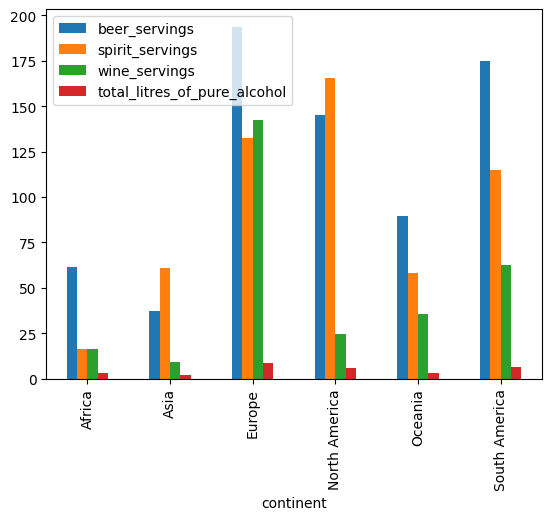

In [78]:
%matplotlib inline

drinks_without_countries.groupby('continent').mean().plot(kind='bar')

## Exercise

1. Compute the number of passengers and the average ticket fare based on the port of embarkment
2. Compare the number of female and male passengers who have survived the sinking
3. Compare the mean age of passengers who survived the sinking with the mean age of passengers who have died

In [79]:
#1. Computing number of passengers
titanic_port = titanic[['Embarked', 'Fare']]
titanic_port.groupby('Embarked').mean().round(2)

,Fare
Embarked,
C,40.29
Q,11.27
S,26.08


         ID
Sex        
female   56
male    100


<Axes: xlabel='Sex'>

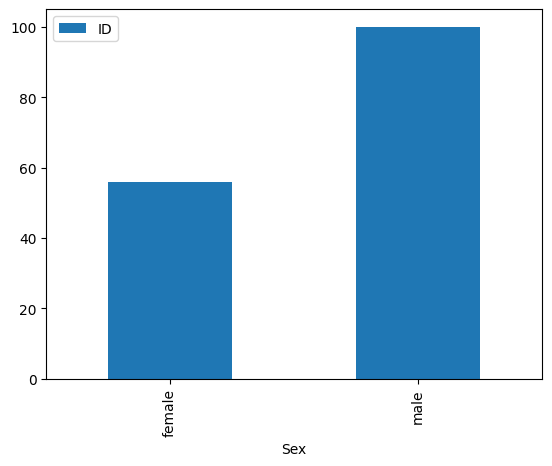

In [80]:
#2. Comparing number of male and female passengers
titanic_sex = titanic[['Sex', 'ID']].groupby('Sex').count()
print(titanic_sex)
titanic_sex.plot(kind = 'bar')

            Age
Survived       
0         29.36
1         25.62


<Axes: xlabel='Survived'>

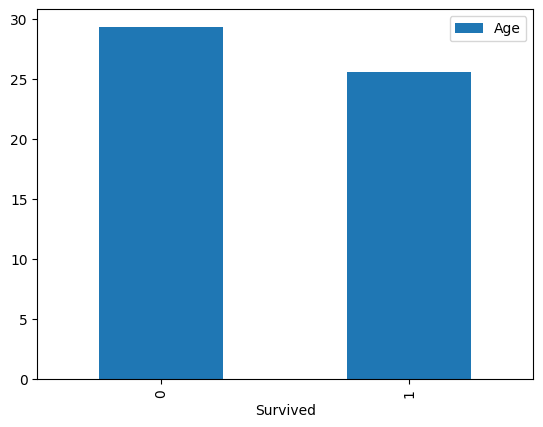

In [81]:
#3. Compare mean age of passengers who survived and who died
titanic_age = titanic[['Survived', 'Age']].groupby('Survived').mean().round(2)
print(titanic_age)
titanic_age.plot(kind = 'bar')

## Exploring the data frame

Here we list some useful functions to run after reading the data to get some better understanding of the data.

In [82]:
movies = pd.read_csv('https://bit.ly/imdbratings')

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [83]:
movies.star_rating.describe()

count    979.000000
mean       7.889785
std        0.336069
min        7.400000
25%        7.600000
50%        7.800000
75%        8.100000
max        9.300000
Name: star_rating, dtype: float64

In [84]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [85]:
movies.genre.value_counts()

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: count, dtype: int64

In [86]:
movies.genre.value_counts(normalize=True)

genre
Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: proportion, dtype: float64

Since the result of the `value_counts()` function is a `Series` object, we can process it further.

<Axes: xlabel='genre'>

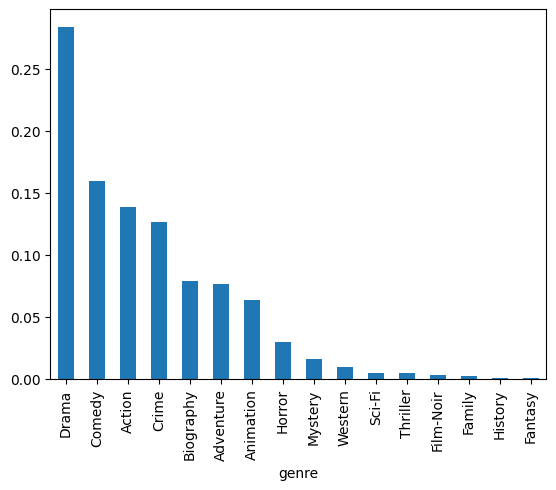

In [87]:
movies.genre.value_counts(normalize=True).plot(kind='bar')

<Axes: ylabel='Frequency'>

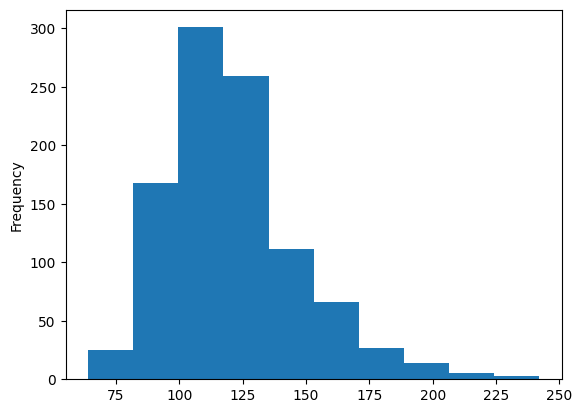

In [88]:
movies.duration.plot(kind='hist')

In [89]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [90]:
genres = movies.genre.unique()

for g in genres:
    df = movies[movies.genre == g]

A useful method allows you to quickly create pivot tables from series objects.

In [91]:
genres = movies.genre
ratings = movies.content_rating

In [92]:
genres

0          Crime
1          Crime
2          Crime
3         Action
4          Crime
         ...    
974       Comedy
975    Adventure
976       Action
977       Horror
978        Crime
Name: genre, Length: 979, dtype: object

In [93]:
ratings

0          R
1          R
2          R
3      PG-13
4          R
       ...  
974       PG
975       PG
976    PG-13
977       PG
978        R
Name: content_rating, Length: 979, dtype: object

In [94]:
pd.crosstab(genres, ratings)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


## Handling missing values

When working with a data frame, we must be careful when the data contains missing values. Two functions are very useful when working with missing values:
- `isnull()`: returns `True` if a value is missing
- `dropna()`: allows to remove rows and/or columns with missing values

In [95]:
ufo = pd.read_csv('https://bit.ly/uforeports')

ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [96]:
ufo['Colors Reported'].isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
18236     True
18237     True
18238     True
18239    False
18240     True
Name: Colors Reported, Length: 18241, dtype: bool

In [97]:
ufo['Colors Reported'].isnull().sum()

15359

In [98]:
ufo.isnull().sum()

City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [99]:
ufo.shape

(18241, 5)

In [100]:
ufo.dropna(how = 'all', axis = 0, subset=['Colors Reported', 'City'])
#how = 'all' -> drop if na is both in 'Colors Reported' and 'City'; 'any' -> drop if na is either in 'City' or 'Colors Reported'

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


## Exercise

1. Remove from the `titanic` dataframe records which do not have the age of the passenger registered
2. Compute the number of missing cabin numbers for each class of passengers

In [101]:
#1. Removing passengers without age being registered
dropping_no_age = titanic.dropna(subset = 'Age')
dropping_no_age.head(20)

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,Sandstrom,Miss. Marguerite Rut,female,4.0,1,1,PP 9549,16.7000,G6,S


In [102]:
classes_with_NaN = titanic[['Pclass', 'ID']].groupby('Pclass').count()
classes_without_NaN = titanic.dropna(subset=['Cabin'])[['Pclass', 'ID']].groupby('Pclass').count()
classes_with_NaN - classes_without_NaN

,ID
Pclass,
1,6
2,26
3,93


## What is an index?

An `Index` is a special type that can be used to access rows and columns. There are three main uses for an index:
- identification of rows/columns
- selection of rows/columns
- alignment of rows

In [103]:
drinks = pd.read_csv('https://bit.ly/drinksbycountry')

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [104]:
drinks.set_index('country', inplace=True)

drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


Notice that the index of a data frame is inherited by all series.

In [105]:
drinks.continent.head()

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [106]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12])

In [107]:
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')

Index is very useful to select both rows and columns. All you need to remember is that `pd.loc` function expects you to provide index entries for rows and columns that you want to retrieve.

In [108]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [109]:
drinks.loc['Poland', :]

beer_servings                      343
spirit_servings                    215
wine_servings                       56
total_litres_of_pure_alcohol      10.9
continent                       Europe
Name: Poland, dtype: object

In [111]:
drinks.loc['Gabon':'Guyana', 'beer_servings']

country
Gabon            347
Gambia             8
Georgia           52
Germany          346
Ghana             31
Greece           133
Grenada          199
Guatemala         53
Guinea             9
Guinea-Bissau     28
Guyana            93
Name: beer_servings, dtype: int64

In [112]:
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [113]:
drinks.loc[['Poland', 'Germany', 'France'], 'beer_servings':'wine_servings']

,beer_servings,spirit_servings,wine_servings
country,,,
Poland,343,215,56
Germany,346,117,175
France,127,151,370


Let's create a `Series` object with an index that can be aligned with our `drinks` data frame.

In [114]:
population = pd.Series([4000000, 38000000, 80000000, 70000000], 
                       index=['Albania', 'Poland', 'Germany', 'France'], 
                       name='population')

population

Albania     4000000
Poland     38000000
Germany    80000000
France     70000000
Name: population, dtype: int64

In [115]:
drinks.loc[['Albania', 'Poland', 'Germany', 'France', 'Greece']].beer_servings * population

Albania    3.560000e+08
France     8.890000e+09
Germany    2.768000e+10
Greece              NaN
Poland     1.303400e+10
dtype: float64

In [116]:
pd.concat([drinks, population], axis=1)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,4000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,NaN
Angola,217,57,45,5.9,Africa,NaN
...,...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America,NaN
Vietnam,111,2,1,2.0,Asia,NaN
Yemen,6,0,0,0.1,Asia,NaN
Zambia,32,19,4,2.5,Africa,NaN


You can always revert to a default "row number" index and move the index column to the column list.

In [117]:
drinks.reset_index(inplace=True)

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


## Indexing with `loc`, `iloc`, and `ix`

This is quite confusing. Try to remember the following rules:
- `loc` uses row/column indexes (aka labels), the ranges are **inclusive**
- `iloc` uses integer positions on the list of rows and columns, the ranges are **exclusive**
- `ix` was an old way of indexing a dataframe allowing to use both labels and integer positions, it is deprecated

In [191]:
ufo = pd.read_csv('https://bit.ly/uforeports')

ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [118]:
ufo.loc[0:3, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [119]:
ufo.loc[[0,2,4], 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
2,Holyoke,NaN,OVAL,CO
4,New York Worlds Fair,NaN,LIGHT,NY


In [120]:
ufo.iloc[0:3, 1:3]

,Colors Reported,Shape Reported
0,NaN,TRIANGLE
1,NaN,OTHER
2,NaN,OVAL


## Categories and ordered categories

For certain types of columns the data frame can be optimized by switching the type of a column (especially a column used in selection or grouping) into a category type.

In [121]:
drinks = pd.read_csv('https://bit.ly/drinksbycountry')

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [122]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [123]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [124]:
drinks.continent.memory_usage(deep=True)

12460

In [125]:
drinks.continent

0               Asia
1             Europe
2             Africa
3             Europe
4             Africa
           ...      
188    South America
189             Asia
190             Asia
191           Africa
192           Africa
Name: continent, Length: 193, dtype: object

In [126]:
drinks.continent = drinks.continent.astype('category')

drinks.continent.memory_usage(deep=True)

884

In [127]:
drinks.continent

0               Asia
1             Europe
2             Africa
3             Europe
4             Africa
           ...      
188    South America
189             Asia
190             Asia
191           Africa
192           Africa
Name: continent, Length: 193, dtype: category
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

You can perform various operations on a category, just remember to access it via `cat` property.

In [128]:
drinks.continent.cat.codes

0      1
1      2
2      0
3      2
4      0
      ..
188    5
189    1
190    1
191    0
192    0
Length: 193, dtype: int8

In [129]:
drinks.continent.cat.as_ordered()

0               Asia
1             Europe
2             Africa
3             Europe
4             Africa
           ...      
188    South America
189             Asia
190             Asia
191           Africa
192           Africa
Name: continent, Length: 193, dtype: category
Categories (6, object): ['Africa' < 'Asia' < 'Europe' < 'North America' < 'Oceania' < 'South America']

Ordered category can be used to allow for logical sorting of rows.

In [130]:
df = pd.DataFrame({
    'name': ['Mount Everest', 'Kilimanjaro', 'Rysy'],
    'height': ['very high', 'high', 'low']
})

df

,name,height
0,Mount Everest,very high
1,Kilimanjaro,high
2,Rysy,low


In [131]:
df.sort_values('height')

,name,height
1,Kilimanjaro,high
2,Rysy,low
0,Mount Everest,very high


In [132]:
from pandas.api.types import CategoricalDtype

heights = CategoricalDtype(categories=['low', 'high', 'very high'], ordered=True)

df['height'] = df.height.astype(heights) 

In [133]:
df.sort_values('height')

,name,height
2,Rysy,low
1,Kilimanjaro,high
0,Mount Everest,very high


## Exercise

1. Change the index of the `titanic` dataframe to the ticket number
2. Change the `Pclass` attribute into a category. 

In [134]:
titanic

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [135]:
#1. Changing index
titanic.set_index(['Ticket'])

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,,,
A/5 21171,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,7.2500,NaN,S
PC 17599,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,71.2833,C85,C
STON/O2. 3101282,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,7.9250,NaN,S
113803,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,53.1000,C123,S
373450,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
113776,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,66.6000,C2,S
A.5. 11206,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,8.0500,NaN,S
A/5. 851,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,14.5000,NaN,S


In [136]:
#2. Changing Pclass into category
titanic.Pclass = titanic.Pclass.astype('category')
titanic.head(20)

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Moran,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


## Creating binary variables from categorical columns

Often in data mining we want to binarize categorical features. One of the most common encodings is the dummy encoding, where a feature with `n` values is turned into `n-1` binary columns

In [137]:
ufo = pd.read_csv('https://bit.ly/uforeports')

ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [138]:
ufo.State.map({'NY': 'New York', 'NJ': 'New Jersey', 'CO': 'Colorado'})

0          New York
1        New Jersey
2          Colorado
3               NaN
4          New York
            ...    
18236           NaN
18237           NaN
18238           NaN
18239           NaN
18240           NaN
Name: State, Length: 18241, dtype: object

In [139]:
pd.get_dummies(ufo.State) #creates table where 1 is iff an object is from specific state and 0 otherwise

,AK,AL,AR,AZ,CA,CO,CT,Ca,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
18239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [140]:
pd.get_dummies(ufo.State, prefix='state') #The same as above but it also changes name of category by adding prefix (NY -> state_NY)

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_Ca,state_DE,state_FL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
18239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [141]:
pd.get_dummies(ufo.State, prefix='state').sum(axis=0) #creates table as above and sums values (same as groupby and count function would do); axis = 0 -> in columns

state_AK     116
state_AL     193
state_AR     206
state_AZ     738
state_CA    2529
state_CO     367
state_CT     225
state_Ca       1
state_DE      43
state_FL     837
state_Fl       4
state_GA     325
state_HI      85
state_IA     162
state_ID     130
state_IL     613
state_IN     326
state_KS     176
state_KY     244
state_LA     174
state_MA     322
state_MD     215
state_ME     181
state_MI     591
state_MN     254
state_MO     448
state_MS     139
state_MT     144
state_NC     356
state_ND      51
state_NE     101
state_NH     125
state_NJ     370
state_NM     241
state_NV     284
state_NY     914
state_OH     667
state_OK     193
state_OR     534
state_PA     598
state_RI      67
state_SC     166
state_SD      57
state_TN     286
state_TX    1027
state_UT     193
state_VA     299
state_VT      44
state_WA    1322
state_WI     357
state_WV     132
state_WY      69
dtype: int64

In [142]:
pd.get_dummies(ufo.State, prefix='state').sum(axis=1) #axis = 1 -> in rows

0        1
1        1
2        1
3        1
4        1
        ..
18236    1
18237    1
18238    1
18239    1
18240    1
Length: 18241, dtype: int64

In [143]:
df = pd.DataFrame({'gender': ['M', 'F', 'F', 'M', 'F', 'M', 'N', 'N']})
df

,gender
0,M
1,F
2,F
3,M
4,F
5,M
6,N
7,N


In [144]:
pd.get_dummies(df.gender)

,F,M,N
0,False,True,False
1,True,False,False
2,True,False,False
3,False,True,False
4,True,False,False
5,False,True,False
6,False,False,True
7,False,False,True


In [145]:
pd.get_dummies(df.gender, drop_first=True) #dropping first category (in this case F)

,M,N
0,True,False
1,False,False
2,False,False
3,True,False
4,False,False
5,True,False
6,False,True
7,False,True


## Display options 

The way `pandas` dataframes are displayed inside a notebook can be modified by accessing display options. Two functions are handy for that:
- `get_option()`: check the current setting
- `set_option()`: modify the current setting

Let's change the following settings:
- the number of rows displayed
- the precision of floats
- the maximum width of a column

In [146]:
movies = pd.read_csv('https://bit.ly/imdbratings')

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [147]:
pd.set_option('display.max_rows', None) #display some number of rows (default = all)
pd.set_option('display.precision', 1) #how many decimal numbers should be displayed
pd.set_option('display.max_colwidth', 25) #maximum width of the column

In [230]:
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Mo..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'..."
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robe..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Le..."
6,8.9,"The Good, the Bad and...",NOT RATED,Western,161,"[u'Clint Eastwood', u..."
7,8.9,The Lord of the Rings...,PG-13,Adventure,201,"[u'Elijah Wood', u'Vi..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ra..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edwa..."


In [148]:
pd.reset_option('display.max_rows')
pd.reset_option('display.precision')
pd.reset_option('display.max_colwidth')

## Applying functions to data frame columns

We can easily apply functions to data frame columns on the fly, or create new columns as the result of applying a function to an existing column. We've seen this behavior before. Two of the most common ways to do it are the `map()` function and the `apply()` function.

In [149]:
drinks = pd.read_csv('https://bit.ly/drinksbycountry')

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [150]:
drinks.country.str.lower()

0      afghanistan
1          albania
2          algeria
3          andorra
4           angola
          ...     
188      venezuela
189        vietnam
190          yemen
191         zambia
192       zimbabwe
Name: country, Length: 193, dtype: object

In [151]:
drinks.country.map(len)

0      11
1       7
2       7
3       7
4       6
       ..
188     9
189     7
190     5
191     6
192     8
Name: country, Length: 193, dtype: int64

In [152]:
pd.concat([drinks.country, drinks.country.map(len)], axis=1) #adding new column

,country,country
0,Afghanistan,11
1,Albania,7
2,Algeria,7
3,Andorra,7
4,Angola,6
...,...,...
188,Venezuela,9
189,Vietnam,7
190,Yemen,5
191,Zambia,6


In [153]:
drinks.apply(max)

country                              Zimbabwe
beer_servings                             376
spirit_servings                           438
wine_servings                             370
total_litres_of_pure_alcohol             14.4
continent                       South America
dtype: object

In [237]:
drinks.apply(max, axis=1) #Error because we cant compare int and str types

TypeError: '>' not supported between instances of 'int' and 'str'

In [154]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [155]:
def get_serious_drinkers(total_alcohol: float) -> bool:
    if total_alcohol >= 10.0:
        return True
    else:
        return False

In [156]:
drinks['heavy_drinkers'] = drinks.total_litres_of_pure_alcohol.apply(get_serious_drinkers)

In [161]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,heavy_drinkers
0,Afghanistan,0,0,0,0.0,Asia,False
1,Albania,89,132,54,4.9,Europe,False
2,Algeria,25,0,14,0.7,Africa,False
3,Andorra,245,138,312,12.4,Europe,True
4,Angola,217,57,45,5.9,Africa,False
5,Antigua & Barbuda,102,128,45,4.9,North America,False
6,Argentina,193,25,221,8.3,South America,False
7,Armenia,21,179,11,3.8,Europe,False
8,Australia,261,72,212,10.4,Oceania,True
9,Austria,279,75,191,9.7,Europe,False


In [162]:
drinks.total_litres_of_pure_alcohol.apply(lambda x: True if x > 10 else False )

0      False
1      False
2      False
3       True
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: total_litres_of_pure_alcohol, Length: 193, dtype: bool

Instead of writing a separate function, many people prefer to use anonymous lambda funciton instead. What you see below is a very common pattern for `pandas` processing.

In [163]:
drinks['country_initial'] = drinks.country.apply(lambda x: x[0])

drinks.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,heavy_drinkers,country_initial
0,Afghanistan,0,0,0,0.0,Asia,False,A
1,Albania,89,132,54,4.9,Europe,False,A
2,Algeria,25,0,14,0.7,Africa,False,A
3,Andorra,245,138,312,12.4,Europe,True,A
4,Angola,217,57,45,5.9,Africa,False,A
5,Antigua & Barbuda,102,128,45,4.9,North America,False,A
6,Argentina,193,25,221,8.3,South America,False,A
7,Armenia,21,179,11,3.8,Europe,False,A
8,Australia,261,72,212,10.4,Oceania,True,A
9,Austria,279,75,191,9.7,Europe,False,A


Sometimes, we want to apply a min/max function to a set of columns and find which column produces the result. This can be achieved using the `idxmax` function.

In [164]:
drinks.loc[:, 'beer_servings':'wine_servings']

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45
...,...,...,...
188,333,100,3
189,111,2,1
190,6,0,0
191,32,19,4


In [165]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [166]:
drinks.loc[:, 'beer_servings':'wine_servings'].idxmax(axis=1)

0        beer_servings
1      spirit_servings
2        beer_servings
3        wine_servings
4        beer_servings
            ...       
188      beer_servings
189      beer_servings
190      beer_servings
191      beer_servings
192      beer_servings
Length: 193, dtype: object

## Exercise

1. Create a new column which contains the age each of the passengers would have had today (Titanic sunk in 1912)
2. Create a new column with the string value *survived* or *died* for each passenger
3. Create a new column `Deck` containig the symbol of the deck on which the passenger was travelling (the first letter of the cabin number)

In [167]:
#1. Creating column with today's age
titanic['Today_age'] = titanic.Age.apply(lambda x: x + 112)
titanic.head(20)

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Today_age
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,134.0
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,150.0
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,138.0
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,147.0
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,147.0
5,6,0,3,Moran,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S,166.0
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S,114.0
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S,139.0
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C,126.0


In [168]:
#2. Creating column survived or died
titanic['Survived_or_died'] = titanic.Survived.apply(lambda x: 'Survived' if x else 'Died')
titanic

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Today_age,Survived_or_died
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,134.0,Died
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,150.0,Survived
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,138.0,Survived
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,147.0,Survived
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,147.0,Died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S,134.0,Survived
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S,167.5,Died
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S,152.5,Died
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S,NaN,Died


In [169]:
#3. Creating column with deck number
titanic['Deck'] = titanic.Cabin.apply(lambda x: str(x)[0] if str(x) != 'nan' else 'No info')
titanic

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Today_age,Survived_or_died,Deck
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,134.0,Died,No info
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,150.0,Survived,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,138.0,Survived,No info
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,147.0,Survived,C
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,147.0,Died,No info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S,134.0,Survived,C
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S,167.5,Died,No info
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S,152.5,Died,No info
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S,NaN,Died,No info


## Joining data frames

There are multiple methods to join data frames, but we will focus on only two methods and forget about the rest:
- `pd.concat`: joins data frames vertically or horizontally
- `pd.merge`: performs database-like inner, outer, left, and right-joins based on an index or a column

In [170]:
cities = pd.DataFrame({
    'country': ['Germany', 'Germany', 'Poland', 'Poland', 'Russia', 'Russia'],
    'city': ['Berlin', 'Munich', 'Warsaw', 'Cracow', 'Moscow', 'St Petersburg'],
    'is_capital': [True, False, True, False, True, False]
})

banks = pd.DataFrame({
    'country': ['Germany', 'Germany', 'Poland', 'France', 'France'],
    'name': ['Deutsche Bank', 'Commerzbank', 'Santander', 'Credit Agricole', 'BNP Paribas']
    
})

In [171]:
pd.concat([cities, banks], axis=0) #merge vertically

,country,city,is_capital,name
0,Germany,Berlin,True,NaN
1,Germany,Munich,False,NaN
2,Poland,Warsaw,True,NaN
3,Poland,Cracow,False,NaN
4,Russia,Moscow,True,NaN
5,Russia,St Petersburg,False,NaN
0,Germany,NaN,NaN,Deutsche Bank
1,Germany,NaN,NaN,Commerzbank
2,Poland,NaN,NaN,Santander
3,France,NaN,NaN,Credit Agricole


In [172]:
pd.concat([cities, banks], axis=1) #merge horrizontally

,country,city,is_capital,country,name
0,Germany,Berlin,True,Germany,Deutsche Bank
1,Germany,Munich,False,Germany,Commerzbank
2,Poland,Warsaw,True,Poland,Santander
3,Poland,Cracow,False,France,Credit Agricole
4,Russia,Moscow,True,France,BNP Paribas
5,Russia,St Petersburg,False,NaN,NaN


In [173]:
pd.merge(cities, banks) #Inner (natural) join

,country,city,is_capital,name
0,Germany,Berlin,True,Deutsche Bank
1,Germany,Berlin,True,Commerzbank
2,Germany,Munich,False,Deutsche Bank
3,Germany,Munich,False,Commerzbank
4,Poland,Warsaw,True,Santander
5,Poland,Cracow,False,Santander


In [174]:
banks.columns = ['country_name', 'bank_name']

pd.merge(cities, banks) #error because column names are different

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [175]:
pd.merge(cities, banks, left_on='country', right_on='country_name') #specifying columns to be joined by

,country,city,is_capital,country_name,bank_name
0,Germany,Berlin,True,Germany,Deutsche Bank
1,Germany,Berlin,True,Germany,Commerzbank
2,Germany,Munich,False,Germany,Deutsche Bank
3,Germany,Munich,False,Germany,Commerzbank
4,Poland,Warsaw,True,Poland,Santander
5,Poland,Cracow,False,Poland,Santander


In [176]:
cities.set_index('country', inplace=True)
banks.set_index('country_name', inplace=True)

pd.merge(cities, banks, left_index=True, right_index=True)

,city,is_capital,bank_name
country,,,
Germany,Berlin,True,Deutsche Bank
Germany,Berlin,True,Commerzbank
Germany,Munich,False,Deutsche Bank
Germany,Munich,False,Commerzbank
Poland,Warsaw,True,Santander
Poland,Cracow,False,Santander


In [178]:
pd.merge(cities, banks, left_index=True, right_index=True, how='inner') #intersection

,city,is_capital,bank_name
country,,,
Germany,Berlin,True,Deutsche Bank
Germany,Berlin,True,Commerzbank
Germany,Munich,False,Deutsche Bank
Germany,Munich,False,Commerzbank
Poland,Warsaw,True,Santander
Poland,Cracow,False,Santander


In [179]:
pd.merge(cities, banks, left_index=True, right_index=True, how='left') #everything from left, something from right

,city,is_capital,bank_name
country,,,
Germany,Berlin,True,Deutsche Bank
Germany,Berlin,True,Commerzbank
Germany,Munich,False,Deutsche Bank
Germany,Munich,False,Commerzbank
Poland,Warsaw,True,Santander
Poland,Cracow,False,Santander
Russia,Moscow,True,NaN
Russia,St Petersburg,False,NaN


In [180]:
pd.merge(cities, banks, left_index=True, right_index=True, how='right') #everything from right, something from left

,city,is_capital,bank_name
country,,,
Germany,Berlin,True,Deutsche Bank
Germany,Munich,False,Deutsche Bank
Germany,Berlin,True,Commerzbank
Germany,Munich,False,Commerzbank
Poland,Warsaw,True,Santander
Poland,Cracow,False,Santander
France,NaN,NaN,Credit Agricole
France,NaN,NaN,BNP Paribas


In [181]:
pd.merge(cities, banks, left_index=True, right_index=True, how='outer') #outer join == all

,city,is_capital,bank_name
country,,,
France,NaN,NaN,Credit Agricole
France,NaN,NaN,BNP Paribas
Germany,Berlin,True,Deutsche Bank
Germany,Berlin,True,Commerzbank
Germany,Munich,False,Deutsche Bank
Germany,Munich,False,Commerzbank
Poland,Warsaw,True,Santander
Poland,Cracow,False,Santander
Russia,Moscow,True,NaN


## Using pipes for data processing

The most pythonic way of performing a sequence of operations is to chain operators. However, this may not result in the most readable code. A simple library called `pipe` solves this problem by borrowing the chaining syntax from R.

Before observing `pipe` in action, let us first analyze the behavior of traditional `map()` and `filter()` functions.

In [182]:
numbers = list(range(10))

even_numbers = list(filter(lambda x: x % 2 == 0, numbers))
even_numbers

[0, 2, 4, 6, 8]

In [183]:
squares = list(map(lambda x: x**2, numbers))
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [185]:
def square(x): return x**2
def is_even(x): return x % 2 == 0

squares_of_even_numbers = list(map(square, filter(is_even, numbers)))
squares_of_even_numbers

[0, 4, 16, 36, 64]

The same functionality can be much easier achieved using pipes.

In [186]:
from pipe import where, select

list(numbers 
     | where(is_even)
     | select(square)
    )

[0, 4, 16, 36, 64]

pipe operator `|` simply passes the output of one function as the input to another function. The remaining functions perform the following:
- `where`: filter out only those element of the iterable which fulfill the condition
- `select`: applies a function to each element of the iterable
- `traverse`: recursively unchain a sequence of iterables
- `groupby`: groups elements of an iterable 
- `dedup`: removes duplicates from an iterable

In [187]:
from pipe import dedup

numbers = [1, 2, 3, 4, 5] * 3

print(f"Before deduplication: {numbers}")
print(f"After deduplication: {list(numbers | dedup)}")

Before deduplication: [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
After deduplication: [1, 2, 3, 4, 5]


In [188]:
from pipe import traverse

nested_numbers = [1, 2, 3, [4, 5], [6, 7], 8, [9, 0]]

print(f"Unnested numbers: {list(nested_numbers | traverse)}")

Unnested numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]


In [189]:
from pipe import groupby

numbers = list(range(10))

even_odd_numbers = list(
    numbers 
    | groupby(lambda x: "even" if x % 2 == 0 else "odd") 
    | select(lambda x: {x[0]: list(x[1])})
    )

print(f"Even and odd numbers: {even_odd_numbers}")

Even and odd numbers: [{'even': [0, 2, 4, 6, 8]}, {'odd': [1, 3, 5, 7, 9]}]


In [241]:
some_list = list(numbers | groupby(lambda x: "even" if x % 2 == 0 else "odd"))
some_list

[('even', <itertools._grouper at 0x15d1f8d00>),
 ('odd', <itertools._grouper at 0x15d174a90>)]

## Exercise

Using pipes, perform the following queries:

1. List unique ages of women who survived the sinking
2. Compute the mean age of passengers based on the port of embarkment
3. Create a list of titles (Mr., Mrs., etc.) and last names of passengers who died.

In [248]:
titanic

,ID,Survived,Pclass,last_name,first_name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Today_age,Survived_or_died,Deck
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,134.0,Died,No info
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,150.0,Survived,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,138.0,Survived,No info
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,147.0,Survived,C
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,147.0,Died,No info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S,134.0,Survived,C
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S,167.5,Died,No info
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S,152.5,Died,No info
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S,NaN,Died,No info


In [266]:
#1. Unique ages of women who survived
unique_ages = list(list(titanic.dropna(subset = ['Age'])[(titanic.Sex == 'female') & (titanic.Survived == 1)].Age) | dedup)
unique_ages.sort()
print(unique_ages)

[3.0, 4.0, 5.0, 14.0, 15.0, 17.0, 19.0, 21.0, 22.0, 23.0, 24.0, 26.0, 27.0, 29.0, 30.0, 32.5, 33.0, 34.0, 35.0, 38.0, 49.0, 55.0, 58.0]


/var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/ipykernel_1127/4113388797.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_ages = list(list(titanic.dropna(subset = ['Age'])[(titanic.Sex == 'female') & (titanic.Survived == 1)].Age) | dedup)


In [306]:
import statistics

#2. Compute mean age based on port
titanic_ex2 = titanic.dropna(subset = ['Embarked', 'Age'])[['Embarked', 'Age']].values.tolist()
means_age = list(titanic_ex2 | groupby(lambda x: x[0]) | select(lambda x: {x[0]: round(statistics.mean(list([y[1] for y in x[1]])), 2)}))
print(means_age)

[{'C': 29.66}, {'Q': 25.1}, {'S': 27.86}]


In [333]:
#3. Create list of titles and last names of passengers who died
def get_title(x):
    title = x[:x.find('.')+1]
    return title

titanic_ex3 = titanic[['first_name', 'last_name', 'Survived']].values.tolist()
title_and_name = list(titanic_ex3 | where(lambda x: x[2] == 0) | select(lambda x: get_title(x[0]) + ' ' + x[1]))
title_and_name


[' Mr. Braund',
 ' Mr. Allen',
 ' Mr. Moran',
 ' Mr. McCarthy',
 ' Master. Palsson',
 ' Mr. Saundercock',
 ' Mr. Andersson',
 ' Miss. Vestrom',
 ' Master. Rice',
 ' Mrs. Vander Planke',
 ' Mr. Fynney',
 ' Miss. Palsson',
 ' Mr. Emir',
 ' Mr. Fortune',
 ' Mr. Todoroff',
 ' Don. Uruchurtu',
 ' Mr. Wheadon',
 ' Mr. Meyer',
 ' Mr. Holverson',
 ' Mr. Cann',
 ' Miss. Vander Planke',
 ' Mrs. Ahlin',
 ' Mrs. Turpin',
 ' Mr. Kraeff',
 ' Mr. Rogers',
 ' Mr. Lennon',
 ' Mr. Samaan',
 ' Mrs. Arnold-Franchi',
 ' Master. Panula',
 ' Mr. Nosworthy',
 ' Mr. Ostby',
 ' Mr. Novel',
 ' Master. Goodwin',
 ' Mr. Sirayanian',
 ' Mr. Harris',
 ' Master. Skoog',
 ' Mr. Stewart',
 ' Mr. Crease',
 ' Mr. Kink',
 ' Mr. Jenkin',
 ' Miss. Goodwin',
 ' Mr. Hood',
 ' Mr. Chronopoulos',
 ' Mr. Moen',
 ' Mr. Staneff',
 ' Mr. Moutal',
 ' Mr. Waelens',
 ' Mr. Carrau',
 ' Mr. Ford',
 ' Mr. Slocovski',
 ' Mr. Celotti',
 ' Mr. Christmann',
 ' Mr. Andreasson',
 ' Mr. Chaffee',
 ' Mr. Dean',
 ' Mr. Coxon',
 ' Mr. Shorney',
 '